# README

1. Install Selenium
2. Install Web Driver yang digunakan (misal chrome install web driver chrome, misal edge instal web driver edge) - versinya sesuaikan dengan versi web appnya
3. Akses Maps Menggunakan Place Id (Search Place Id Finder buat cari id dari lokasi)
4. Inspect Element


### Import Library

In [107]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
from itertools import zip_longest
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from googletrans import Translator



In [108]:
translator = Translator()

### Konfigurasi Web Driver

In [109]:
# Konfigurasi WebDriver
options = webdriver.EdgeOptions()
options.use_chromium = True
# options.add_argument("headless")  # Untuk menjalankan browser dalam mode headless
driver = webdriver.Edge(options=options)
wait = WebDriverWait(driver, 5)



### Tentukan target lokasi

In [110]:
# Buka halaman Google Maps berdasarkan place id
ahass_panglima_jaya = "ChIJy8o9kNH71y0RMPCH2a8jyIE"
ahass_mutiara_motor = "ChIJM7Q_Ns371y0RgsVCneDEVvw"
ahass_dinoyo = "ChIJC1wN5bD71y0RwmNs98Ch4OE"
itts = "ChIJHVqSy9H71y0RnwWbLgvLvh0"

# driver.get(f'https://www.google.com/maps/place/?q=place_id:{ahass_panglima_jaya}')
# driver.get(f'https://www.google.com/maps/place/?q=place_id:{ahass_mutiara_motor}')
# driver.get(f'https://www.google.com/maps/place/?q=place_id:{ahass_dinoyo}')
driver.get(f'https://www.google.com/maps/place/?q=place_id:{itts}')

###  Karena letak komen dan review ada di sidebar, pastikan elemen tersebut bisa kita akses

In [111]:
sidebar = wait.until(EC.presence_of_element_located((By.ID, 'QA0Szd')))

### Define Sidebar Konten untuk di scrool (karena sidebar ada 2 colom, colom button, dan kolom konten)

In [112]:
# Define the element to scroll
element_to_scroll = sidebar.find_element(By.CSS_SELECTOR, '#QA0Szd > div > div > div.w6VYqd > div.bJzME.tTVLSc > div > div.e07Vkf.kA9KIf > div > div')

### Define Fungsi untuk scrool

In [113]:
# Function to scroll to the element
def scroll_to_element(element):
    driver.execute_script("arguments[0].scrollIntoView(false);", element)
    
    time.sleep(5)  # Wait for 5 seconds after scrolling

### Scrool sampe button more review ditemukan

In [114]:
# Scroll until the "More reviews" button is visible
button_more_reviews = None
while not button_more_reviews:
    try:
        button_more_reviews = element_to_scroll.find_element(By.CSS_SELECTOR, 'div > button[aria-label*="ulasan lainnya" i], div > button[aria-label*="reviews" i]')
    except:
        scroll_to_element(element_to_scroll)

### Memastikan elemen button tampil dan siap di klik

In [115]:
# Scroll a bit more to ensure the button is fully visible
scroll_to_element(button_more_reviews)
time.sleep(5)

# Wait until the button is clickable
wait = WebDriverWait(driver, 5)
button_more_reviews = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'div > button[aria-label*="ulasan lainnya" i], div > button[aria-label*="reviews" i]')))


### Klik Button 

In [116]:
# Click the "More reviews" button
button_more_reviews.click()

### Define Sidebar Baru (setelah kita klik tombol reviews)

In [117]:
element_to_scroll = sidebar.find_element(By.CSS_SELECTOR, '#QA0Szd > div > div > div.w6VYqd > div.bJzME.tTVLSc > div > div.e07Vkf.kA9KIf > div > div > div.m6QErb.DxyBCb.kA9KIf.dS8AEf')

### Buat Fungsi baru untuk auto scrolling sampai bawah

In [118]:
# Fungsi untuk melakukan scroll ke bawah
def scroll_to_bottom(element):
    driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", element)
    time.sleep(10)  # Jeda 10 detik setelah melakukan scroll


### Jalankan auto scrooling sampai limit scrool habis/ pentokin

In [119]:
# Lakukan scroll ke bawah sampai mentok
limit_scrool = 2
while True:
    previous_height = driver.execute_script("return arguments[0].scrollHeight", element_to_scroll)
    scroll_to_bottom(element_to_scroll)
    current_height = driver.execute_script("return arguments[0].scrollHeight", element_to_scroll)
    if current_height == previous_height or limit_scrool == 0:
        break
    limit_scrool -= 1

### Cari elemen html yang mau kita cari dari komen section (nama-status-year-star-comments)

In [120]:
names = driver.find_elements(By.CSS_SELECTOR, 'div.d4r55')
status = driver.find_elements(By.CSS_SELECTOR, 'div.RfnDt')
year = driver.find_elements(By.CSS_SELECTOR, 'div.DU9Pgb span.rsqaWe')

star = driver.find_elements(By.CSS_SELECTOR, 'span.kvMYJc[aria-label*="stars"]')
if (len(star) < 1) : #buat validasi bahasa
    star = driver.find_elements(By.CSS_SELECTOR, 'span.kvMYJc[aria-label*="bintang"]')

comments = driver.find_elements(By.CSS_SELECTOR, 'div.MyEned')

# for st in status:
#     print(len(st.text.split('·')))

In [121]:
names[0].text

'Adi Prasetyo'

### Check sebelum insert

In [122]:
name_list = []
reviewer_status_list = []
total_reviews_list = []
year_list = []
star_list = []
comment_list = []

print("len names", len(names))
print("len status", len(status))
print("len year", len(year))
print("len star", len(star))
print("len comments", len(comments))

len names 30
len status 30
len year 30
len star 30
len comments 30


In [123]:

for name, stat, year, st, comment in zip_longest(names, status, year, star, comments, fillvalue=""):
    print("\nName:", name.text)
    name_list.append(name.text)
    # Karena pada status bisa mereturn status reviewer dan total jumlah review, jadi kita cleaning sekalian
    if len(stat.text.split('·')) == 2:
        print("Reviewer Status :", stat.text.split('·')[0])
        print("Total Reviews :", stat.text.split('·')[1])
        reviewer_status_list.append(stat.text.split('·')[0])
        total_reviews_list.append(stat.text.split('·')[1])
    else :
        # karena gak semua status memiliki status reviewer dan total jumlah review
        print("Status:", stat.text.split('·')[0])
        print("Reviewer Status:", "Non Local Guide")
        reviewer_status_list.append("Non Local Guide")
        total_reviews_list.append(stat.text.split('·')[0])
    print("Periode:", year.text)
    year_list.append(year.text)
    try:
        # Kita split karena outputnya adalah ex "4 Bintang"
        print("Star:", st.get_attribute('aria-label').split()[0])
        star_list.append(st.get_attribute('aria-label').split()[0])
    except:
        # Kadang setelah scrool tidak tergenerate semua htmlnya (antisipasi)
        print("Star: NaN")
        star_list.append(float('nan'))
    try :
        print("Comment:", comment.text) 
        comment_list.append(comment.text)
    except : 
        print("Comment: Comment not found") 
        comment_list.append("comment not found")
    print("---")


Name: Adi Prasetyo
Reviewer Status : Local Guide 
Total Reviews :  171 ulasan
Periode: 5 hari lalu
Star: 5
Comment: Salah satu kampus it telkom di daerah strategis Surabaya, tepatnya di daerah Ketintang. Program studi disini juga lumayan lengkap. Fasilitas cukup memadai dan baik. Halamannya cukup luas dan bersih. Sangat recommended untuk belajar disini.
---

Name: Rosyid Abdillah
Reviewer Status : Local Guide 
Total Reviews :  10 ulasan
Periode: 6 bulan lalu
Star: 5
Comment: salah satu opsi terbaik untuk studi lanjut dibidang IT. Karena dibawa naungan BUMN terbaik negeri, kedepan tentu akan jadi salah satu perguruan tinggi ternama di Jatim dan Indoensia
---

Name: Alea Tania
Status: 6 ulasan
Reviewer Status: Non Local Guide
Periode: 6 bulan lalu
Star: 5
Comment: Salah satu kampus terbaik dengan era digital dan mampu mengembangkan banyak inovasi baru dengan perkembangan teknologi yang semakin besar.
---

Name: firdy
Reviewer Status : Local Guide 
Total Reviews :  30 ulasan
Periode: 3 m

### Insert ke data frame biar rapih

In [124]:
df = pd.DataFrame({
    'Name': name_list,
    'Reviewer Status': reviewer_status_list,
    'Total Reviews': total_reviews_list,
    'Year': year_list,
    'Star': star_list,
    'Comment': comment_list
})


In [125]:
df.head()

,Name,Reviewer Status,Total Reviews,Year,Star,Comment
0,Adi Prasetyo,Local Guide,171 ulasan,5 hari lalu,5,Salah satu kampus it telkom di daerah strategi...
1,Rosyid Abdillah,Local Guide,10 ulasan,6 bulan lalu,5,salah satu opsi terbaik untuk studi lanjut dib...
2,Alea Tania,Non Local Guide,6 ulasan,6 bulan lalu,5,Salah satu kampus terbaik dengan era digital d...
3,firdy,Local Guide,30 ulasan,3 minggu lalu,5,mau cari kampus swasta terbaik? ya disini temp...
4,Titin Widowati,Local Guide,13 ulasan,sebulan lalu,5,Berkunjung ke sini pengen jalan jalan aja liha...


In [134]:
def hapus_ulasan(nilai):
    return nilai.split()[0]

df['Total Reviews'] = df['Total Reviews'].apply(hapus_ulasan)
df['Total Reviews'] = df['Total Reviews'].astype(int)

df.head()

,Name,Reviewer Status,Total Reviews,Year,Star,Comment
0,Adi Prasetyo,Local Guide,171,5 hari lalu,5,Salah satu kampus it telkom di daerah strategi...
1,Rosyid Abdillah,Local Guide,10,6 bulan lalu,5,salah satu opsi terbaik untuk studi lanjut dib...
2,Alea Tania,Non Local Guide,6,6 bulan lalu,5,Salah satu kampus terbaik dengan era digital d...
3,firdy,Local Guide,30,3 minggu lalu,5,mau cari kampus swasta terbaik? ya disini temp...
4,Titin Widowati,Local Guide,13,sebulan lalu,5,Berkunjung ke sini pengen jalan jalan aja liha...


In [127]:
df['Star'].describe()

count     30
unique     2
top        5
freq      28
Name: Star, dtype: object

In [128]:
df['Reviewer Status'].value_counts()

Non Local Guide    18
Local Guide        12
Name: Reviewer Status, dtype: int64

In [129]:
df['Star'].value_counts()

5    28
4     2
Name: Star, dtype: int64

Text(0, 0.5, 'Count')

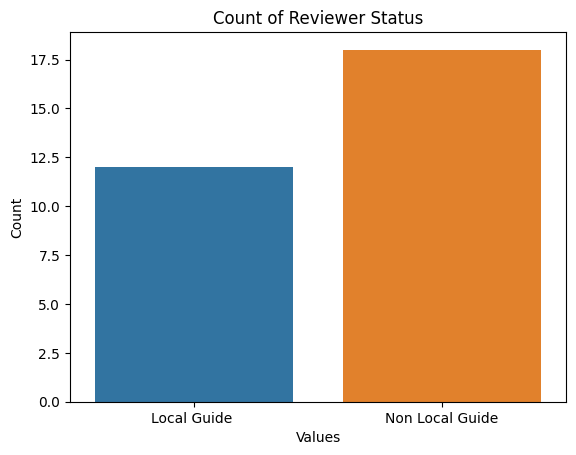

In [130]:
# Membuat count plot menggunakan seaborn
sns.countplot(data=df, x='Reviewer Status')

# Memberikan judul dan label sumbu
plt.title('Count of Reviewer Status')
plt.xlabel('Values')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

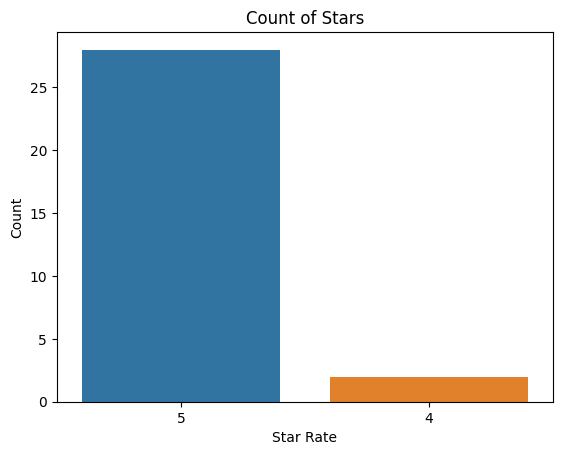

In [131]:
# Membuat count plot menggunakan seaborn
sns.countplot(data=df, x='Star')

# Memberikan judul dan label sumbu
plt.title('Count of Stars')
plt.xlabel('Star Rate')
plt.ylabel('Count')

In [132]:
df.head()

,Name,Reviewer Status,Total Reviews,Year,Star,Comment
0,Adi Prasetyo,Local Guide,171 ulasan,5 hari lalu,5,Salah satu kampus it telkom di daerah strategi...
1,Rosyid Abdillah,Local Guide,10 ulasan,6 bulan lalu,5,salah satu opsi terbaik untuk studi lanjut dib...
2,Alea Tania,Non Local Guide,6 ulasan,6 bulan lalu,5,Salah satu kampus terbaik dengan era digital d...
3,firdy,Local Guide,30 ulasan,3 minggu lalu,5,mau cari kampus swasta terbaik? ya disini temp...
4,Titin Widowati,Local Guide,13 ulasan,sebulan lalu,5,Berkunjung ke sini pengen jalan jalan aja liha...


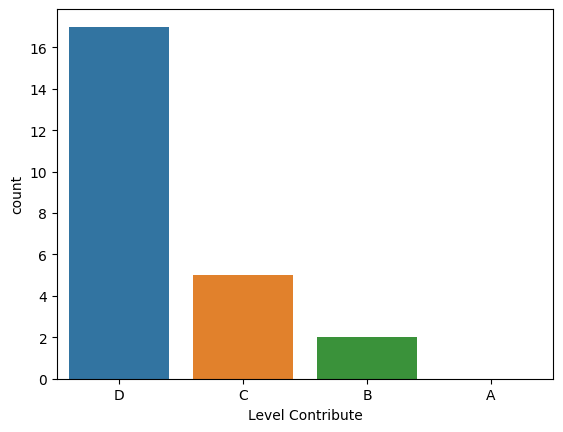

In [135]:
bins = [0, 10, 20, 30, 50]
labels = ['D', 'C', 'B', 'A']

df['Level Contribute'] = pd.cut(df['Total Reviews'], bins=bins, labels=labels)
# Visualisasi menggunakan count plot
sns.countplot(data=df, x='Level Contribute')

plt.show()


In [136]:
comments = df['Comment'].values.tolist()
translated_comments = []

# Menerjemahkan setiap elemen dalam list comments
for comment in comments:
    terjemahan = translator.translate(comment, src='id', dest='en')
    translated_comments.append(terjemahan.text)
    
print(translated_comments)


['One of the Telkom IT campuses in the Surabaya strategic area, precisely in the Ketintang area.The study program here is also quite complete.The facilities are quite adequate and good.The page is quite spacious and clean.Very recommended to study here.', 'One of the best options for further study in the IT field.Because the auspices of the Best BUMN of the State, in the future will certainly be one of the well -known universities in East Java and Indonesia', 'One of the best campuses with the digital era and is able to develop many new innovations with increasingly greater technological developments.', 'Want to find the best private campus?yes here is the place 😍 ...', 'Visiting here just want to walk to see the campus.The security is raaaamaaah ...', 'I see this campus is cool & clean.The major of technology here is also very good and millennial.As far as I know, there are majoring in digital business, information technology, information systems, informatics, data science,\nTelecommu

In [ ]:
neg = 0
pos = 0
not_both = 0


for comment in translated_comments:
    blob = TextBlob(comment)
    sentiment = blob.sentiment.polarity

    if sentiment > 0:
        pos += 1
    elif sentiment < 0:
        neg += 1
    else:
        not_both += 1
        
print("Pos : ", pos)
print("Neg : ", neg)
print("Not Both : ", not_both)

Pos :  11
Neg :  3
Not Both :  5
